✅ Imagem carregada: (396, 397, 4)


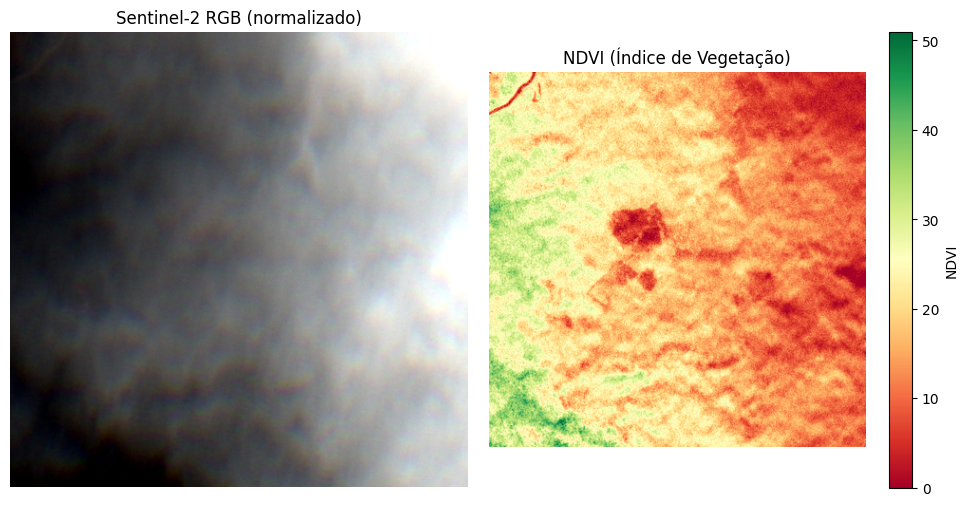

In [ ]:
# 🛰️ Visualização Sentinel-2 RGB + NDVI

import numpy as np
import matplotlib.pyplot as plt
import tifffile

# Caminho para imagem cacheada
sentinel_path = "../data/raw/sentinel2/LATm10.350_LONm67.150.tiff"

# Carregamento com tifffile (bandas)
image = tifffile.imread(sentinel_path)
print("✅ Imagem carregada:", image.shape)

# Função de normalização para realce visual
def normalize_band(band, lower=2, upper=98):
    p_low, p_high = np.percentile(band, (lower, upper))
    return np.clip((band - p_low) / (p_high - p_low), 0, 1)

# Normalização RGB
rgb_norm = np.stack([
    normalize_band(image[:, :, 0]),
    normalize_band(image[:, :, 1]),
    normalize_band(image[:, :, 2])
], axis=-1)

# Plot RGB + NDVI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_norm)
plt.title("Sentinel-2 RGB (normalizado)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image[:, :, 3], cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (Índice de Vegetação)")
plt.axis("off")

plt.tight_layout()
plt.show()
